In [1]:
import numpy as np
import random

class PSO:
    def __init__(self, dim, size, iter_num, x_max, max_vel, best_fitness_value=float('Inf'), C1 = 2, C2 = 2, W = 1):
        self.C1 = C1
        self.C2 = C2
        self.W = W
        self.dim = dim  # 粒子的维度
        self.size = size  # 粒子个数
        self.iter_num = iter_num  # 迭代次数
        self.x_max = x_max
        self.max_vel = max_vel  # 粒子最大速度
        self.best_fitness_value = best_fitness_value
        self.best_position = [0.0 for i in range(dim)]  # 种群最优位置
        self.fitness_val_list = []  # 每次迭代最优适应值

        # 对种群进行初始化
        self.Particle_list = [Particle(self.x_max, self.max_vel, self.dim) for i in range(self.size)]

    # 更新速度
    def update_vel(self, part):
        for i in range(self.dim):
            vel_value = self.W * part.get_vel()[i] + self.C1 * random.random() * (part.get_best_pos()[i] - part.get_pos()[i]) \
                        + self.C2 * random.random() * (self.get_bestPosition()[i] - part.get_pos()[i])
            if vel_value > self.max_vel:
                vel_value = self.max_vel
            elif vel_value < -self.max_vel:
                vel_value = -self.max_vel
            part.set_vel(i, vel_value)

    # 更新位置
    def update_pos(self, part):
        for i in range(self.dim):
            pos_value = part.get_pos()[i] + part.get_vel()[i]
            part.set_pos(i, pos_value)
        value = fit_fun(part.get_pos())
        if value < part.get_fitness_value():
            part.set_fitness_value(value)
            for i in range(self.dim):
                part.set_best_pos(i, part.get_pos()[i])
        if value < self.get_bestFitnessValue():
            self.set_bestFitnessValue(value)
            for i in range(self.dim):
                self.set_bestPosition(i, part.get_pos()[i])

    def update(self):
        for i in range(self.iter_num):
            for part in self.Particle_list:
                self.update_vel(part)  # 更新速度
                self.update_pos(part)  # 更新位置
            self.fitness_val_list.append(self.get_bestFitnessValue())  # 每次迭代完把当前的最优适应度存到列表
        return self.fitness_val_list, self.get_bestPosition()




In [2]:
import matplotlib.pyplot as plt
import numpy as np


dim = 2
size = 20
iter_num = 1000
x_max = 10
max_vel = 0.5

pso = PSO(dim, size, iter_num, x_max, max_vel)
fit_var_list, best_pos = pso.update()
print("最优位置:" + str(best_pos))
print("最优解:" + str(fit_var_list[-1]))
plt.plot(np.linspace(0, iter_num, iter_num), fit_var_list, c="R", alpha=0.5)
plt.show()


NameError: name 'Particle' is not defined

[1.58524515] [0.01117206]
[2.30539166] -0.9607512220143373
[2.71353597] -0.999352966796546
[2.12718863] -0.9999296648107538
[1.19009287] -0.9999296648107538
[1.81786542] -0.9999296648107538
[2.98014815] -0.9999296648107538
[2.59853806] -0.9999296648107538
[1.41099174] -0.9999296648107538
[1.46516137] -0.9999296648107538
[2.47070347] -0.9999296648107538
[2.66156555] -0.9999296648107538
[1.95324649] -0.9999296648107538
[1.46213683] -0.9999296648107538
[1.8740867] -0.9999296648107538
[2.37268076] -0.9999937035347495
[2.175479] -0.9999937035347495
[1.7236605] -0.9999937035347495
[1.74376945] -0.9999937035347495
[2.06498738] -0.9999937035347495
[2.14742786] -0.9999941405735697
[1.98900186] -0.9999941405735697
[1.92653658] -0.9999941405735697
[1.9507871] -0.9999941405735697
[1.97080062] -0.9999941405735697
[2.01541722] -0.9999941405735697
[2.06178356] -0.9999941405735697
[2.01230298] -0.9999941405735697
[1.93670681] -0.9999987583287626
[1.95072953] -0.9999987583287626
[2.02143116] -0.9999987

<ipython-input-3-b12af9fc0d18>:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


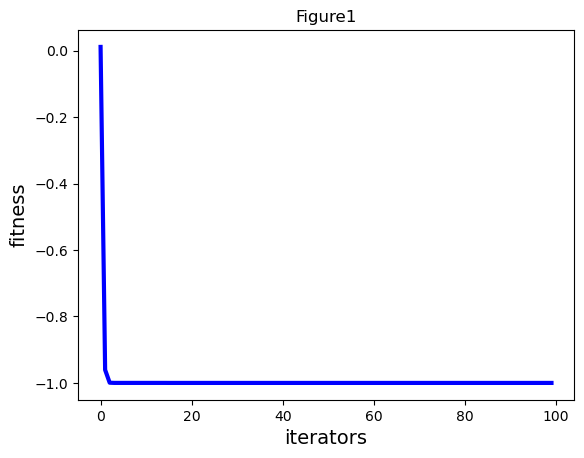

In [3]:
# coding: utf-8
import numpy as np
import random
import matplotlib.pyplot as plt


# ----------------------PSO参数设置---------------------------------
class PSO():
    def __init__(self, pN, dim, max_iter):
        self.w = 0.8
        self.c1 = 2
        self.c2 = 2
        self.r1 = 0.6
        self.r2 = 0.3
        self.pN = pN  # 粒子数量
        self.dim = dim  # 搜索维度
        self.max_iter = max_iter  # 迭代次数
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 个体经历的最佳位置和全局最佳位置
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每个个体的历史最佳适应值
        self.fit = 1e10  # 全局最佳适应值

    # ---------------------目标函数-----------------------------
    def function(self, X):
        return X**2-4*X+3

    # ---------------------初始化种群----------------------------------
    def init_Population(self):
        for i in range(self.pN):
            for j in range(self.dim):
                self.X[i][j] = random.uniform(0, 1)
                self.V[i][j] = random.uniform(0, 1)
            self.pbest[i] = self.X[i]
            tmp = self.function(self.X[i])
            self.p_fit[i] = tmp
            if tmp < self.fit:
                self.fit = tmp
                self.gbest = self.X[i]

                # ----------------------更新粒子位置----------------------------------

    def iterator(self):
        fitness = []
        for t in range(self.max_iter):
            for i in range(self.pN):  # 更新gbest\pbest
                temp = self.function(self.X[i])
                if temp < self.p_fit[i]:  # 更新个体最优
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if self.p_fit[i] < self.fit:  # 更新全局最优
                        self.gbest = self.X[i]
                        self.fit = self.p_fit[i]
            for i in range(self.pN):
                self.V[i] = self.w * self.V[i] + self.c1 * self.r1 * (self.pbest[i] - self.X[i]) + \
                            self.c2 * self.r2 * (self.gbest - self.X[i])
                self.X[i] = self.X[i] + self.V[i]
            fitness.append(self.fit)
            print(self.X[0], end=" ")
            print(self.fit)  # 输出最优值
        return fitness

        # ----------------------程序执行-----------------------


my_pso = PSO(pN=30, dim=1, max_iter=100)
my_pso.init_Population()
fitness = my_pso.iterator()
# -------------------画图--------------------
plt.figure(1)
plt.title("Figure1")
plt.xlabel("iterators", size=14)
plt.ylabel("fitness", size=14)
t = np.array([t for t in range(0, 100)])
fitness = np.array(fitness)
plt.plot(t, fitness, color='b', linewidth=3)
plt.show()


In [15]:
import pandas as pd
data_root=r'E:\2022_MCM\2022_A\2022_A_solution\PSO.xlsx'
#data_root=r'E:\2022_MCM\2022_A\2022_A_solution\flanders.xlsx'
#pacifier_root=os.path.join(data_root,'Fuji_TT_Circuit.xlsx')
#pre_circuit_data = pd.read_csv('uci_data.csv')
#PSO_data = pd.read_csv('PSO.csv')
PSO_data = pd.read_excel(data_root)
PSO_data


,Time Trial Specialist,Sprinter
0,5688.89,6308.0
1,4588.89,6105.0
2,4588.89,3605.0
3,3288.89,3605.0
4,3288.89,3568.0
...,...,...
115,1914.35,1978.8
116,1914.35,1978.8
117,1914.35,1978.8
118,1914.35,1967.8


In [31]:
PSO_data['Time Trial Specialist']=list(map(lambda x : x/60, PSO_data['Time Trial Specialist']))
PSO_data['Sprinter']=list(map(lambda x : x/60, PSO_data['Sprinter']))

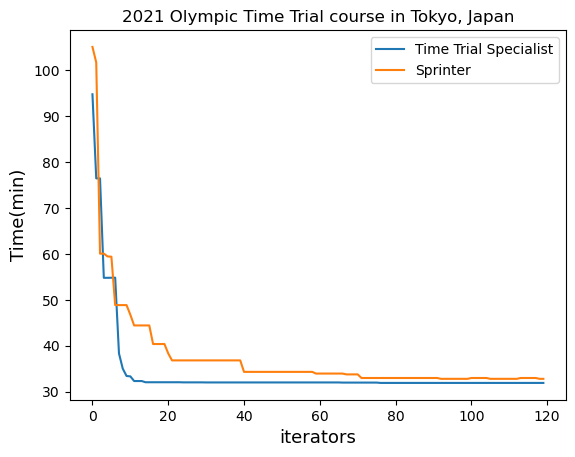

In [44]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_subplot(1,3,1)
tkdf3=PSO_data['Time Trial Specialist'].plot(title='2021 Olympic Time Trial course in Tokyo, Japan',label='Time Trial Specialist',legend=True)
tkdf3=PSO_data['Sprinter'].plot(label='Sprinter',legend=True)

tkdf3.set_ylabel('Time(min)',fontsize=13)
tkdf3.set_xlabel('iterators',fontsize=13)



# ax.plot(PSO_data['Time Trial Specialist'],label='Time Trial Specialist')
# ax.plot(PSO_data['Sprinter'],label='Sprinter')
# ax.set_ylabel('Time(s)',fontsize=15)
# ax.set_xlabel('iterators',fontsize=15)
#tkdf3.title('FUJI')
plt.show()
# >>> fig = plt.figure();ax = fig.add_subplot(1,1,1)
# >>> ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
# [<matplotlib.lines.Line2D object at 0x00000000138E7A58>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
# [<matplotlib.lines.Line2D object at 0x0000000013A46F98>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
# [<matplotlib.lines.Line2D object at 0x0000000013B7CC18>]
# >>> ax.legend(loc='best')
# <matplotlib.legend.Legend object at 0x0000000013356F98>
fig = tkdf3.get_figure()
fig.savefig('FUJI.jpg')



In [63]:
import pandas as pd
data_root=r'E:\2022_MCM\2022_A\2022_A_solution\PSO_spa.xlsx'
#data_root=r'E:\2022_MCM\2022_A\2022_A_solution\flanders.xlsx'
#pacifier_root=os.path.join(data_root,'Fuji_TT_Circuit.xlsx')
#pre_circuit_data = pd.read_csv('uci_data.csv')
#PSO_data = pd.read_csv('PSO.csv')
PSO_data = pd.read_excel(data_root)
PSO_data


,Time Trial Specialist,Sprinter
0,3520.0000,3800.0000
1,3500.0000,3666.0000
2,3485.0000,3525.0000
3,3485.0000,3300.0000
4,3485.0000,3125.0000
...,...,...
115,868.1815,765.7546
116,868.1815,765.7546
117,868.1815,765.7546
118,868.1815,765.7546


In [64]:
PSO_data['Time Trial Specialist']=list(map(lambda x : x/60, PSO_data['Time Trial Specialist']))
PSO_data['Sprinter']=list(map(lambda x : x/60, PSO_data['Sprinter']))

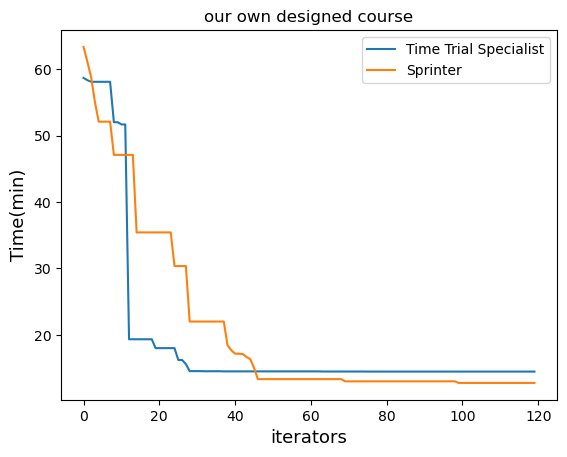

In [65]:
tkdf3=PSO_data['Time Trial Specialist'].plot(title='our own designed course',label='Time Trial Specialist',legend=True)
tkdf3=PSO_data['Sprinter'].plot(label='Sprinter',legend=True)

tkdf3.set_ylabel('Time(min)',fontsize=13)
tkdf3.set_xlabel('iterators',fontsize=13)



# ax.plot(PSO_data['Time Trial Specialist'],label='Time Trial Specialist')
# ax.plot(PSO_data['Sprinter'],label='Sprinter')
# ax.set_ylabel('Time(s)',fontsize=15)
# ax.set_xlabel('iterators',fontsize=15)
#tkdf3.title('FUJI')
plt.show()
# >>> fig = plt.figure();ax = fig.add_subplot(1,1,1)
# >>> ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
# [<matplotlib.lines.Line2D object at 0x00000000138E7A58>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
# [<matplotlib.lines.Line2D object at 0x0000000013A46F98>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
# [<matplotlib.lines.Line2D object at 0x0000000013B7CC18>]
# >>> ax.legend(loc='best')
# <matplotlib.legend.Legend object at 0x0000000013356F98>
fig = tkdf3.get_figure()
fig.savefig('spa.png')

# UCI

In [59]:
data_root=r'E:\2022_MCM\2022_A\2022_A_solution\PSO_uci.xlsx'
#data_root=r'E:\2022_MCM\2022_A\2022_A_solution\flanders.xlsx'
#pacifier_root=os.path.join(data_root,'Fuji_TT_Circuit.xlsx')
#pre_circuit_data = pd.read_csv('uci_data.csv')
#PSO_data = pd.read_csv('PSO.csv')
PSO_data = pd.read_excel(data_root)
PSO_data


,Time Trial Specialist,Sprinter
0,8952.0,9553.0
1,8763.0,9228.0
2,8205.0,9228.0
3,6395.0,9228.0
4,6395.0,8720.0
...,...,...
115,3748.6,4061.9
116,3748.6,4061.9
117,3748.6,4061.9
118,3748.6,4061.9


In [60]:
PSO_data['Time Trial Specialist']=list(map(lambda x : x/60, PSO_data['Time Trial Specialist']))
PSO_data['Sprinter']=list(map(lambda x : x/60, PSO_data['Sprinter']))

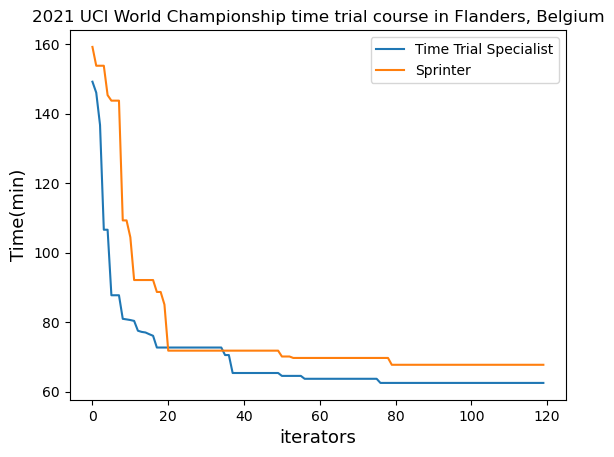

In [62]:
tkdf3=PSO_data['Time Trial Specialist'].plot(title='2021 UCI World Championship time trial course in Flanders, Belgium',label='Time Trial Specialist',legend=True)
tkdf3=PSO_data['Sprinter'].plot(label='Sprinter',legend=True)

tkdf3.set_ylabel('Time(min)',fontsize=13)
tkdf3.set_xlabel('iterators',fontsize=13)



# ax.plot(PSO_data['Time Trial Specialist'],label='Time Trial Specialist')
# ax.plot(PSO_data['Sprinter'],label='Sprinter')
# ax.set_ylabel('Time(s)',fontsize=15)
# ax.set_xlabel('iterators',fontsize=15)
#tkdf3.title('FUJI')
plt.show()
# >>> fig = plt.figure();ax = fig.add_subplot(1,1,1)
# >>> ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
# [<matplotlib.lines.Line2D object at 0x00000000138E7A58>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
# [<matplotlib.lines.Line2D object at 0x0000000013A46F98>]
# >>> ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
# [<matplotlib.lines.Line2D object at 0x0000000013B7CC18>]
# >>> ax.legend(loc='best')
# <matplotlib.legend.Legend object at 0x0000000013356F98>
fig = tkdf3.get_figure()
fig.savefig('UCI.png')

In [66]:
data_root=r'E:\2022_MCM\2022_A\2022_A_solution\FUJI_task2.xlsx'
#data_root=r'E:\2022_MCM\2022_A\2022_A_solution\flanders.xlsx'
#pacifier_root=os.path.join(data_root,'Fuji_TT_Circuit.xlsx')
#pre_circuit_data = pd.read_csv('uci_data.csv')
#PSO_data = pd.read_csv('PSO.csv')
PSO_data = pd.read_excel(data_root)
PSO_data

,W,p,CP,Wtoatl,S
0,5000.000000,0.000000,250,5000,0.000000e+00
1,5000.000000,123.234730,250,5000,2.009776e-07
2,5000.000000,135.668618,250,5000,9.704135e-07
3,5000.000000,149.395997,250,5000,4.835383e-06
4,5000.000000,162.993170,250,5000,2.142653e-05
...,...,...,...,...,...
16392,925.005172,310.266989,250,5000,2.292942e+01
16393,925.005172,316.748602,250,5000,2.267664e+01
16394,925.005172,315.912090,250,5000,2.238386e+01
16395,925.005172,310.012925,250,5000,2.213114e+01


In [70]:
W=list(PSO_data['W'])
p=list(PSO_data['p'])
CP=list(PSO_data['CP'])
Wtoatl=list(PSO_data['Wtoatl'])
S=list(PSO_data['S'])


In [71]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

# time = np.arange(10)
# temp = np.random.random(10)*30
# Swdown = np.random.random(10)*100-10
# Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(S, CP, '-', label = 'CP')
lns2 = ax.plot(S, p, '-', label = 'p')
ax2 = ax.twinx()
lns3 = ax2.plot(S, Wtoatl, '-r', label = 'temp')
lns4 = ax2.plot(S, W, '-', label = 'temp')

# added these three lines
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
plt.savefig('0.png')

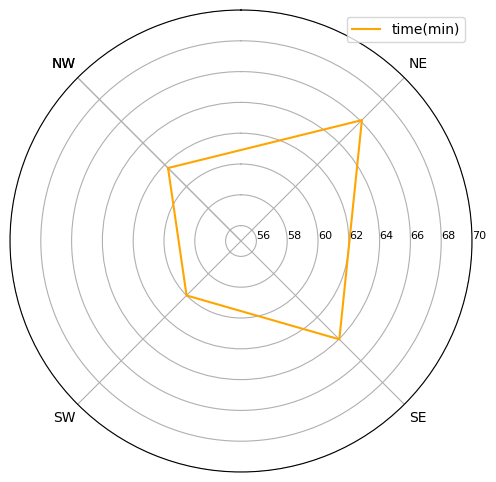

In [90]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
 
 
results = [{"NW": 61.7, "SW": 60, "SE":64.03,"NE": 66.1}]
data_length = len(results[0])
# 将极坐标根据数据长度进行等分
angles = np.linspace(0.25*np.pi, (2+0.25)*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
# 使雷达图数据封闭
score_a = np.concatenate((score[0], [score[0][0]]))

angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
# 设置图形的大小
fig = plt.figure(figsize=(8, 6), dpi=100)
# 新建一个子图
ax = plt.subplot(111, polar=True)
# 绘制雷达图
ax.plot(angles, score_a, color='orange')

# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles*180/np.pi, labels)
# 设置雷达图的0度起始位置
ax.set_theta_zero_location('N')
# 设置雷达图的坐标刻度范围
ax.set_rlim(55, 70)
# 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_rlabel_position(270)
#ax.set_title("计算机专业大一（上）")
plt.legend(["time(min)"], loc='best')
plt.yticks(fontsize=8,color='#000000')

plt.savefig('direction.png')
plt.show()

In [92]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas
# Load dataset
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print(dataset.head(10))
# descriptions
print(dataset.describe())
x = dataset.iloc[:,0] #提取第一列的sepal-length变量
mu =np.mean(x) #计算均值
sigma =np.std(x)
mu,sigma

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
m

(5.843333333333334, 0.8253012917851409)

In [93]:
num_bins = 4#直方图柱子的数量

n, bins, patches = plt.hist(x, num_bins,normed=1, facecolor='blue', alpha=0.5)
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象
y = mlab.normpdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y 
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel('sepal-length') #绘制x轴
plt.ylabel('Probability') #绘制y轴
plt.title(r'Histogram : $\mu=5.8433$,$\sigma=0.8253$')#中文标题 u'xxx' 

plt.subplots_adjust(left=0.15)#左边距 
plt.show() 

AttributeError: 'Rectangle' object has no property 'normed'

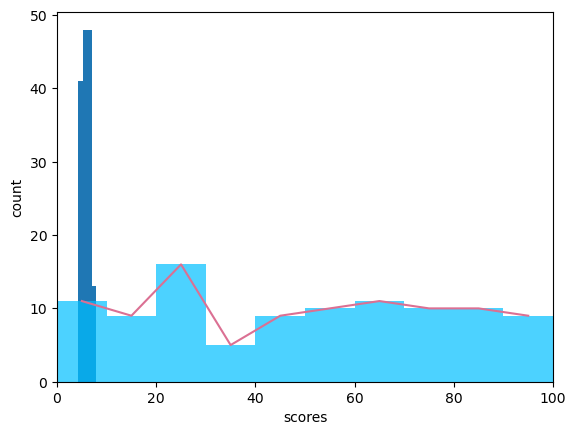

In [94]:
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randint(0,100,100)#生成【0-100】之间的100个数据,即 数据集
bins=np.arange(0,101,10)#设置连续的边界值，即直方图的分布区间[0,10],[10,20]...
width=10#柱状图的宽度
#直方图会进行统计各个区间的数值
frequency_each,_,_= plt.hist(x,bins,color='deepskyblue',width=width,alpha=0.7)#alpha设置透明度，0为完全透明
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0,100)#设置x轴分布范围
plt.plot(bins[1:]-(width//2),frequency_each,color='palevioletred')#利用返回值来绘制区间中点连线
plt.show()